In [79]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# No mttbar regularization
fileptr_1D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2017/Nominal/combined/b1k.root")
fileptr_2D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2017/Nominal/combined/b1k_mttbar.root")

In [81]:
# With mttbar regularization
# fileptr_1D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined_w_reg_mttbar/c_kk.root")
# fileptr_2D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined_w_reg_mttbar/c_kk_mttbar.root")

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f03927c6a10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

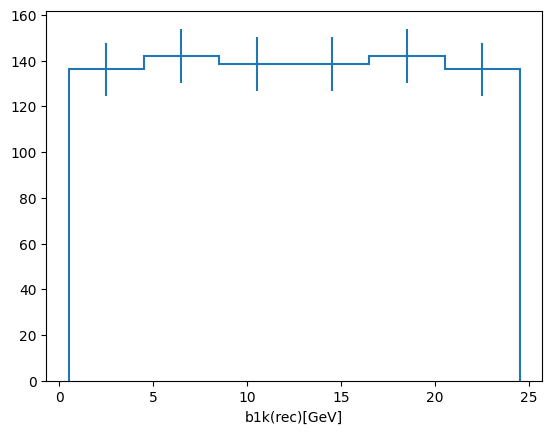

In [82]:
fileptr_1D['b1kTUnfResultCor_rebinnedA'].to_hist().plot()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0392753790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

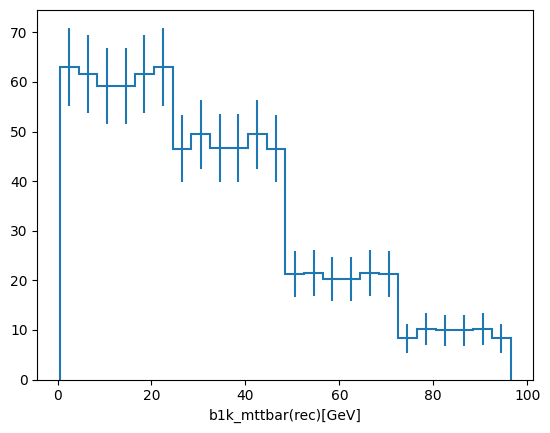

In [83]:
fileptr_2D['b1k_mttbarTUnfResultCor_rebinnedA'].to_hist().plot()

## Now try to add bins of the 2D dist to 1D 
<center>
### $Y_{1D}$ = $\Sigma_{i}$ $(Y_{2D, i} \pm \sigma_{2D,i}) $ where $i$ is modulo 6 bins

In [84]:
unfolded_result_2D = fileptr_2D['b1k_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0]
unfolded_result_2D

array([63.02522211, 61.68377607, 59.17773173, 59.20748402, 61.68415777,
       63.0249722 , 46.5729836 , 49.42283697, 46.73594771, 46.76063867,
       49.4224257 , 46.57308709, 21.23295542, 21.42416935, 20.2486207 ,
       20.25849409, 21.42409607, 21.23295407,  8.34771081, 10.19436162,
        9.92802005,  9.93128959, 10.19449243,  8.34768479])

In [85]:
unfolded_ematrix_2D = fileptr_2D['b1k_mttbarEmatrixCor_rebinnedA'].to_numpy()[0]
unfolded_error_2D   = np.sqrt([unfolded_ematrix_2D[i][i] for i in range(24)])
unfolded_error_2D

array([2.77481498, 1.71474703, 2.36123261, 2.36129332, 1.71481707,
       2.77477659, 1.26656204, 1.0933261 , 1.05752291, 1.05768079,
       1.09331604, 1.26656427, 1.08301886, 0.96565553, 0.97273976,
       0.97293841, 0.96565676, 1.08301714, 0.59109785, 0.98523283,
       1.40657475, 1.40710345, 0.98524032, 0.59109659])

In [86]:
merged_unfolded_from_2D = np.zeros(6)
merged_error_from_2D    = np.zeros(6)

for i in [0, 6, 12, 18] :
    merged_unfolded_from_2D += unfolded_result_2D[i:i+6]
    merged_error_from_2D    += unfolded_error_2D[i:i+6]

In [87]:
merged_unfolded_from_2D

array([139.17887194, 142.725144  , 136.0903202 , 136.15790637,
       142.72517197, 139.17869815])

In [88]:
merged_error_from_2D

array([5.71549373, 4.75896149, 5.79807003, 5.79901597, 4.75903019,
       5.71545459])

### Load in the 1D unfolded result and errors

In [89]:
y_1D = fileptr_1D['b1kTUnfResultCor_rebinnedA'].to_numpy()[0]
y_1D

array([136.238326  , 142.09658633, 138.42645338, 138.49431854,
       142.09646634, 136.23827769])

In [90]:
unfolded_ematrix_1D = fileptr_1D['b1kEmatrixCor_rebinnedA'].to_numpy()[0]
unfolded_error_1D   = np.sqrt([unfolded_ematrix_1D[i][i] for i in range(6)])
unfolded_error_1D

array([1.17976032, 1.118127  , 1.03859778, 1.03867174, 1.11810167,
       1.17976431])

### Compare merged 2D to 1D

In [91]:
np.divide(merged_unfolded_from_2D, y_1D)

array([1.02158384, 1.00442345, 0.98312365, 0.98312991, 1.0044245 ,
       1.02158292])

In [92]:
np.divide(merged_error_from_2D, unfolded_error_1D)

array([4.84462278, 4.25619049, 5.58259428, 5.58310747, 4.25634833,
       4.84457322])

## Ratios of cross-sections and errors

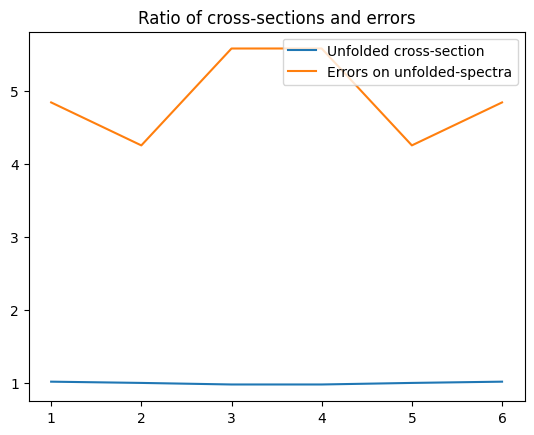

In [93]:
plt.title("Ratio of cross-sections and errors")
plt.plot(np.linspace(1,6,6), np.divide(merged_unfolded_from_2D, y_1D), label='Unfolded cross-section')
plt.plot(np.linspace(1,6,6), np.divide(merged_error_from_2D, unfolded_error_1D), label='Errors on unfolded-spectra')
plt.legend(loc='upper right')
# plt.ylim(0.8, 4.5)